In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# set parameters
smallest_eps = 0
biggest_eps = 2e-3
eps_steps = 20
is_gaussian = False
pretrained = False
model_desc = "resnet34"#"densenet121" # 
save_figs = True

In [22]:
# preparing experiments
if pretrained:
    run_ids = [323, 324, 325] #[261, 262, 263]
else:
    run_ids = [333,334,335] #[320, 321, 322] #[258, 259, 260]
    
races = ["Black", "Indian", "Latino", "Middle Eastern", "Southeast Asian", "East Asian", "White"]
eps_attack = np.linspace(start=smallest_eps, stop=biggest_eps, num=eps_steps)
gaussian = "_gaussian" if is_gaussian else ""
pretraining = "with_pretraining" if pretrained else "without_pretraining"

only white:	3.4859001636505127	(100.00%)
augmented:	2.92579984664917	(83.93%)
original:	3.398200511932373	(97.48%)
Max diff (augm):	nan%
Max diff (orig):	inf%


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


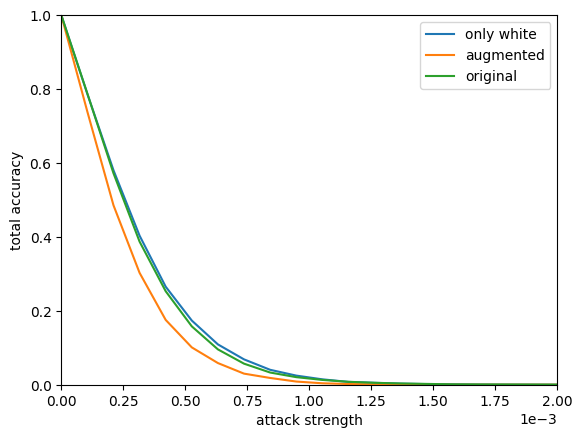

In [23]:
# plot total robustness
total_robs_only_white = np.load(f"robustness_np_arrays/total_rob_{run_ids[0]}_{smallest_eps}_{biggest_eps:.1e}_{eps_steps}_steps{gaussian}.npy")
total_robs_augmented = np.load(f"robustness_np_arrays/total_rob_{run_ids[1]}_{smallest_eps}_{biggest_eps:.1e}_{eps_steps}_steps{gaussian}.npy")
total_robs_original = np.load(f"robustness_np_arrays/total_rob_{run_ids[2]}_{smallest_eps}_{biggest_eps:.1e}_{eps_steps}_steps{gaussian}.npy")


sum_white = np.sum(total_robs_only_white)
sum_aug = np.sum(total_robs_augmented)
sum_orig = np.sum(total_robs_original)
print(f"only white:\t{sum_white}\t({sum_white/sum_white:.2%})")
print(f"augmented:\t{sum_aug}\t({sum_aug/sum_white:.2%})")
print(f"original:\t{sum_orig}\t({sum_orig/sum_white:.2%})")

max_inc_aug = np.max((total_robs_augmented - total_robs_only_white)/total_robs_only_white)
max_inc_orig = np.max((total_robs_original - total_robs_only_white)/total_robs_only_white)
print(f"Max diff (augm):\t{max_inc_aug:.2%}")
print(f"Max diff (orig):\t{max_inc_orig:.2%}")


plt.plot(eps_attack, total_robs_only_white, label="only white")
plt.plot(eps_attack, total_robs_augmented, label="augmented")
plt.plot(eps_attack, total_robs_original, label="original")
plt.xlabel("attack strength")
plt.xlim(smallest_eps, biggest_eps)
plt.ylim(0, 1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ylabel("total accuracy")
plt.legend()
if save_figs:
    plt.savefig(f'robustness_plots/{model_desc}_{pretraining}_{biggest_eps:.1e}_{eps_steps}{gaussian}.png')
plt.show()

Black
only white:	2.9032	(100.00%)
augmented:	2.6335	(90.71%)
original:	3.0494	(105.04%)
Max diff (augm):	nan%
Max diff (orig):	nan%


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


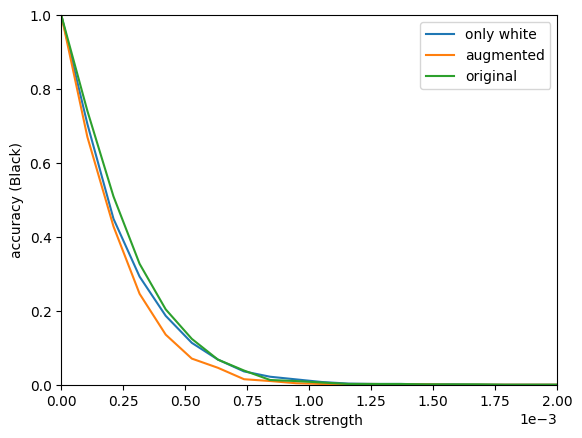


Indian
only white:	3.2527	(100.00%)
augmented:	2.9153	(89.63%)
original:	3.3863	(104.11%)
Max diff (augm):	nan%
Max diff (orig):	nan%


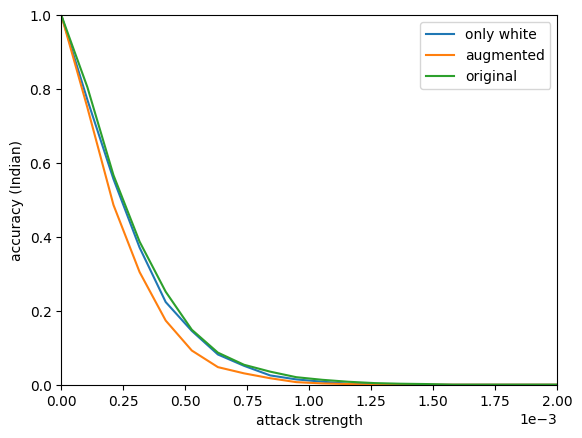


Latino
only white:	3.9850	(100.00%)
augmented:	3.2309	(81.08%)
original:	3.8194	(95.84%)
Max diff (augm):	nan%
Max diff (orig):	nan%


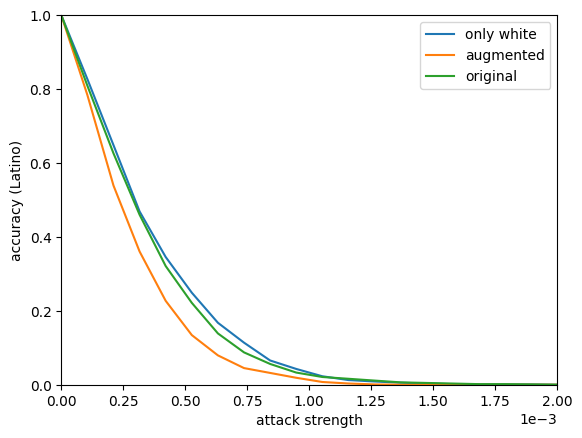


Middle Eastern
only white:	3.9243	(100.00%)
augmented:	3.1678	(80.72%)
original:	3.5517	(90.51%)
Max diff (augm):	nan%
Max diff (orig):	nan%


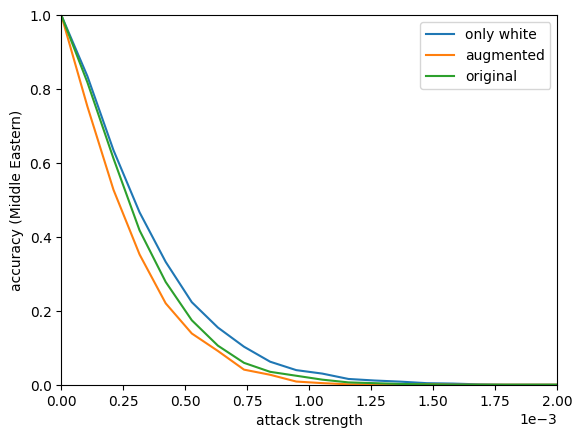


Southeast Asian
only white:	3.1455	(100.00%)
augmented:	2.7966	(88.91%)
original:	3.2165	(102.26%)
Max diff (augm):	nan%
Max diff (orig):	nan%


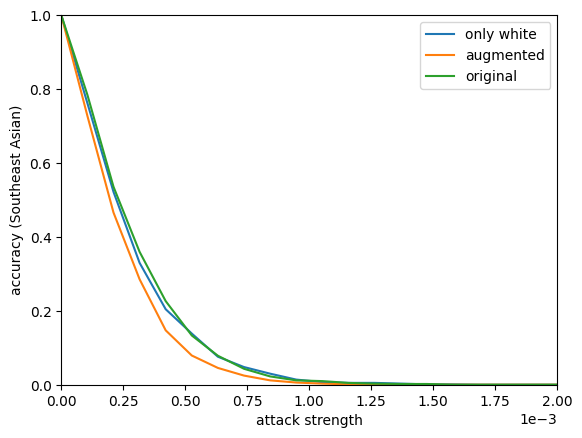


East Asian
only white:	3.4167	(100.00%)
augmented:	2.9822	(87.28%)
original:	3.4567	(101.17%)
Max diff (augm):	nan%
Max diff (orig):	inf%


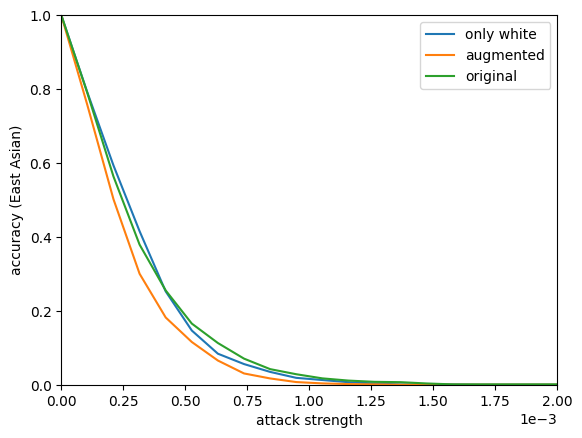


White
only white:	3.6049	(100.00%)
augmented:	2.7777	(77.05%)
original:	3.2787	(90.95%)
Max diff (augm):	nan%
Max diff (orig):	inf%


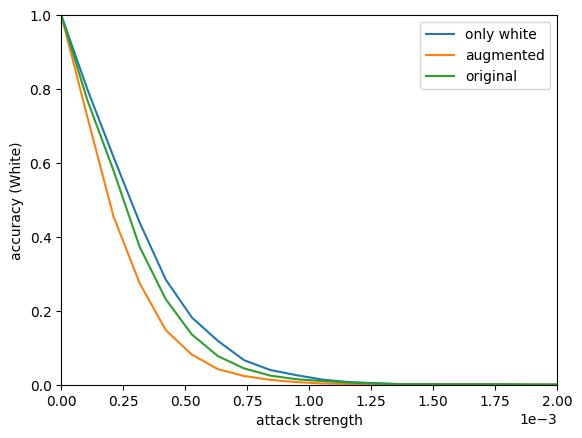

In [24]:
# plot racial robustnesses

robs_only_white = np.load(f"robustness_np_arrays/robs_{run_ids[0]}_{smallest_eps}_{biggest_eps:.1e}_{eps_steps}_steps{gaussian}.npy")
robs_augmented = np.load(f"robustness_np_arrays/robs_{run_ids[1]}_{smallest_eps}_{biggest_eps:.1e}_{eps_steps}_steps{gaussian}.npy")
robs_original = np.load(f"robustness_np_arrays/robs_{run_ids[2]}_{smallest_eps}_{biggest_eps:.1e}_{eps_steps}_steps{gaussian}.npy")


for i, race in enumerate(races):
    print(race)
    rob_only_white = robs_only_white[i]
    rob_augmented = robs_augmented[i]
    rob_original = robs_original[i]

    
    sum_white = np.sum(rob_only_white)
    sum_aug = np.sum(rob_augmented)
    sum_orig = np.sum(rob_original)
    print(f"only white:\t{sum_white:.4f}\t({sum_white/sum_white:.2%})")
    print(f"augmented:\t{sum_aug:.4f}\t({sum_aug/sum_white:.2%})")
    print(f"original:\t{sum_orig:.4f}\t({sum_orig/sum_white:.2%})")

    max_inc_aug = np.max((rob_augmented - rob_only_white)/rob_only_white)
    max_inc_orig = np.max((rob_original - rob_only_white)/rob_only_white)
    print(f"Max diff (augm):\t{max_inc_aug:.2%}")
    print(f"Max diff (orig):\t{max_inc_orig:.2%}")
    
    plt.plot(eps_attack, rob_only_white, label="only white")
    plt.plot(eps_attack, rob_augmented, label="augmented")
    plt.plot(eps_attack, rob_original, label="original")
    # plt.plot(eps_attack, rob_augmented/rob_only_white, label="quotient")
    plt.xlim(smallest_eps, biggest_eps)
    plt.ylim(0, 1)
    plt.xlabel("attack strength")
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ylabel(f"accuracy ({race})")
    plt.legend()
    if save_figs:
        plt.savefig(f'robustness_plots/{model_desc}_{pretraining}_{biggest_eps:.1e}_{eps_steps}{gaussian}_{race}.png')
    plt.show()
    print()